# Enthalpy
This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 7 February 2020.

The objectives of this tutorial Notebook are to show how to work with individual ideal-gas species enthalpies, and with enthalpies of mixtures of ideal gases, using Cantera's `Solution()` object. This includes the relationships between the enthalpy variables that are defined in Cantera and those that are defined and tabulated in Turns 4th ed. We will define the gas mixture using gri30.cti.

The reader should be familiar with the material in the previous Notebook (2_3_Stoichiometry) before working through this Notebook.

## 1. Accessing enthalpy in Cantera

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution()" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

Now let's figure out how to access enthalpy.

In [3]:
# show all available attributes of "gas1"
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

Scrolling down in the window above, you should see several names that look promising: [`h`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.h), [`enthalpy_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.enthalpy_mass), [`enthalpy_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.enthalpy_mole), and [`partial_molar_enthalpies`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.partial_molar_enthalpies) are, in fact, the attributes that we want. Attributes `delta_enthalpy` and `delta_standard_enthalpy` also might sound promising, but those deal with enthalpy changes for individual chemical reactions.

We can verify that we have found what we are looking for by clicking on the links in the previous paragraph, or by using the `help()` command:

In [4]:
# get help for attribute "h"
help(gas1.__class__.h)

Help on getset descriptor cantera._cantera.ThermoPhase.h:

h
    Enthalpy [J/kg or J/kmol] depending on `basis`.



This is the mixture specific enthalpy. It is reported on either a per-unit-mass-of-mixture basis or a per-unit-mole-of-mixture basis, depending on the value of the attribute `basis`. As we have seen before, the default is a mass basis, as you can confirm by printing out the value of `basis`:

In [5]:
# print the currect basis (mass or molar)
gas1.basis

'mass'

To change to a molar basis:

In [6]:
# change to molar basis
gas1.basis = 'molar'
gas1.basis

'molar'

In [7]:
# get help for attribute "enthalpy_mass"
help(gas1.__class__.enthalpy_mass)

Help on getset descriptor cantera._cantera.ThermoPhase.enthalpy_mass:

enthalpy_mass
    Specific enthalpy [J/kg].



In [8]:
# get help for attribute "enthalpy_mole"
help(gas1.__class__.enthalpy_mole)

Help on getset descriptor cantera._cantera.ThermoPhase.enthalpy_mole:

enthalpy_mole
    Molar enthalpy [J/kmol].



So, the enthalpy per unit mass of mixture (J/kg) can always be accessed using `enthalpy_mass`, and the enthalpy per unit mole of mixture (J/kmol) can always be accessed using `enthalpy_mole`, regardless of the current value of `basis`. Since the `basis` is currently set to "molar", the numerical values of `h` and `enthalpy_mole` are equal, while the value of `enthalpy_mass` differs from the value of `enthalpy_mole` by a factor of the mixture molecular weight. Recall that the default initial mixture composition here is pure H2 (corresponding to the first species index), as we have discussed in previous tutorials.

In [9]:
# print current mixture enthalpy values
gas1.h , gas1.enthalpy_mass , gas1.enthalpy_mole

(53360.501873488596, 26470.07851334831, 53360.501873488596)

Next, let's look at `partial_molar_enthalpies`:

In [10]:
# get help for attribute "partial_molar_enthalpies"
help(gas1.__class__.partial_molar_enthalpies)

Help on getset descriptor cantera._cantera.ThermoPhase.partial_molar_enthalpies:

partial_molar_enthalpies
    Array of species partial molar enthalpies [J/kmol].



This is an array that contains the individual species specific enthalpies on a molar basis, independent of the value of `basis`. To confirm that the other two attributes are not what we want:

In [11]:
# get help for attribute "delta_enthalpy"
help(gas1.__class__.delta_enthalpy)

Help on getset descriptor cantera._cantera.Kinetics.delta_enthalpy:

delta_enthalpy
    Change in enthalpy for each reaction [J/kmol].



In [12]:
# get help for attribute "delta_standard_enthalpy"
help(gas1.__class__.delta_standard_enthalpy)

Help on getset descriptor cantera._cantera.Kinetics.delta_standard_enthalpy:

delta_standard_enthalpy
    Change in standard-state enthalpy (independent of composition) for
    each reaction [J/kmol].



We will come back to these later, when we get to chemical reactions.

Now let's get back to the problem at hand. We haven't specified the thermochemical state of gas1, so it is still in its default state: 300 K, 1 atm (101325 Pa), and pure H2 (the first species listed in gri30.cti). To confirm that:

In [13]:
# print full thermochemical state of gas1
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



So, the value of `h` should be 5.336e+04 J/Kmol (since we are now using a molar basis for mixture properties), and this should be identical to the value of `partial_molar_enthalpies` for species H2. To verify this:

In [14]:
# report the mixture molar-specific enthalpy
gas1.h

53360.501873488596

There is some rounding in the values that are reported by gas1(), as we have seen earlier.

In [15]:
# report the individual species molar-specific enthalpies for all species
gas1.partial_molar_enthalpies

array([ 5.33605019e+04,  2.18035626e+08,  2.49214153e+08,  5.43587752e+04,
        3.94021612e+07, -2.41762461e+08,  1.26165142e+07, -1.35800735e+08,
        7.16714422e+08,  5.97388532e+08,  3.92397871e+08,  4.29952454e+08,
        1.46970281e+08, -7.45334773e+07, -1.10475450e+08, -3.93438957e+08,
        4.20637785e+07, -1.08513856e+08, -1.45382027e+07,  1.63738727e+07,
       -2.00857263e+08,  5.66279953e+08,  2.28280211e+08,  2.99817563e+08,
        5.25791932e+07,  1.18751121e+08, -8.37537325e+07,  1.77500467e+08,
       -4.76038555e+07,  7.83664257e+07,  4.72715725e+08,  3.56970228e+08,
        1.92111732e+08, -4.58322167e+07,  2.49579742e+08,  9.13197164e+07,
        3.42618061e+07,  8.16710658e+07,  1.06320877e+08,  4.38734686e+08,
        1.30881615e+08,  2.47403837e+08,  4.62210444e+08,  1.71121934e+08,
       -1.17163190e+07, -1.17991655e+08,  1.31870576e+08,  5.52154185e+04,
        3.84543872e+04,  1.00631882e+08, -1.03716880e+08,  2.52040603e+07,
       -1.66086526e+08])

Note that the individual species molar enthalpies are defined for all species, even though at this point the mixture is pure H2. Since we are working with an ideal-gas mixture, the individual species enthalpy values depend only on temperature. The values reported are those at the current mixture temperature of 300 K. 

Since we know from earlier tutorial Notebooks that H2 is species 0 in the mixture (recall that indexing begins with an index value of 0, not 1), this confirms what we expected.

If we didn't remember that H2 corresponds to species index 0, we could find that as follows:

In [16]:
# get the index corresponding to species H2
index_H2 = gas1.species_index('H2')
index_H2

0

In [17]:
# print the molar specific heat of H2, using index_H2 . . .
gas1.partial_molar_enthalpies[index_H2]

53360.501873488596

In [18]:
# . . . and again, without using index_H2
gas1.partial_molar_enthalpies[gas1.species_index('H2')]

53360.501873488596

Note the use of parentheses to return the desired species index using the *function* `species_index()`, and the use of square brackets to access the desired element of the *array* `partial_molar_enthalpies`, as discussed in an earlier tutorial Notebook.

## 2. Formation enthalpy, sensible enthalpy, and standardized enthalpy

### 2.1 Individual species

The enthalpy values reported by Cantera are *standardized enthalpies*. In the notation used in Turns 4th ed., the species $i$ standardized enthalpy (on a molar basis) is denoted as $ \overline h_i (T) $, or as $ \overline h ^ 0 _ i (T) $, where the superscript $0$ emphasizes that the value is reported at the reference pressure (1 atm). However, for an ideal gas, the enthalpy per unit mole (or per unit mass) is independent of pressure, so the superscript is not really necessary. No species subscript is used in Tables A.1-A.12 of Turns 4th ed., since the species is given for each table.

The standardized enthalpy is the sum of the *formation enthalpy* at the reference temperature $T_{ref}$ (denoted as $ \overline h ^ 0 _ {f,i} (T_{ref}) $) and the *sensible enthalpy* with respect to the reference temperature (denoted as $ \Delta \overline h _ {s,i} (T) $): $ \Delta \overline h _ {s,i} (T) = \overline h _ i (T) - \overline h ^ 0 _ {f,i} (T_{ref} ) $. In Tables A.1-A.12, the value of $ \overline h ^ 0 _ {f,i} (T_{ref}) $ for each species is given in the table heading for that species. Then in the table for each species, the species formation enthalpy and the species sensible enthalpy with respect to the reference temperature are tabulated as functions of temperature: these are the columns headed $ \overline h ^ 0 _ {f} (T) $ and $ ( \overline h ^ 0 (T) - \overline h ^ 0 _ {f} (298) ) $, respectively, where the reference temperature is 298 K (more precisely, $T_{ref} = 25 ^ {\circ} $ C = 298.15 K).

How does the Cantera value of molar-specific enthalpy of H2 compare with the value given in Table A.3 of Turns 4th ed.? To get the standardized enthalpy at 300 K from Table A.3 ($ \overline h (T) $, or $ \overline h ^ 0 (T) $), we need to add the formation enthalpy at the reference temperature to the sensible enthalpy at the temperature of interest (300 K) with respect to the reference temperature. The value of the formation enthalpy at 298 K (in fact, at any temperature) is zero, since H2 is the reference molecular structure for hydrogen. The value of the sensible enthalpy at 300 K (with respect to the reference temperature of 298 K) is in the column labeled $( \overline h ^ 0 (T) - \overline h ^ 0 _ f (298) )$, and at 300 K, the value is 53 kJ/kmol. So, the value of $\overline h ^ 0 (300 K)$ for H2 is 0 kJ/kmol + 53 kJ/kmol = 53 kJ/kmol. Recalling that the Cantera value is in J/kmol, the Cantera value is equal to the Table A.3 value to two significant figures.

It appears, then, that the same reference temperature has been used in Turns 4th ed. and in gri30.cti. To confirm that, we can set the mixture temperature to 298.15 K and check that the enthalpies of H2, O2, and N2 are equal to zero. Solid graphite is not available in gri30.cti, so we can't check the reference state for carbon.

In [19]:
# set gas1 mixture temperature to 298.15 K
gas1.TP = 298.15 , None

gas1()


  gri30:

       temperature          298.15  K
          pressure          101325  Pa
           density       0.0823972  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       0.0065886          0.01328     J
   internal energy     -1.2297e+06       -2.479e+06     J
           entropy           64825        1.307e+05     J/K
    Gibbs function     -1.9328e+07       -3.896e+07     J
 heat capacity c_p           14305        2.884e+04     J/K
 heat capacity c_v           10180        2.052e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7172
     [  +52 minor]              0                0



Recall that the mixture is still pure H2. It can be seen that the enthalpy is close to zero, but is not exactly equal to zero. That is, presumably, because the polynomials that are used to fit the temperature dependence of the species thermodynamic properties (see Table A.13 of Turns 4th ed.) do not give exactly zero at the reference temperature. The same can be confirmed for N2 and for O2:

In [20]:
# report the molar specific enthalpy of N2 at 298.15 K (J/kmol)
gas1.partial_molar_enthalpies[gas1.species_index('N2')]

1429.901959029693

In [21]:
# report the molar specific enthalpy of O2 at 298.15 K (J/kmol)
gas1.partial_molar_enthalpies[gas1.species_index('O2')]

0.016343330944517013

We can also look at values for other species and at other temperatures. For example, let's look at H2O at 2000 K. First, we will get the formation enthalpy of H2O at 298.15 K using Cantera. Since the gas mixture temperature is currently 298.15 K, the sensible enthalpy with respect to 298.15 K is equal to zero, so the value of the standardized enthalpy reported by `partial_molar_enthalpies` is equal to the formation enthalpy at 298.15 K:

In [22]:
# report the molar specific enthalpy of H2O at 298.15 K (J/kmol)
gas1.partial_molar_enthalpies[gas1.species_index('H2O')]

-241824606.55497295

The value for formation enthalpy of H2O at 298 K given in Table A.6 of Turns 4th ed. is -241,845 kJ/kmol, which is equal to four significant figures to the value reported by Cantera.

It is important to note that the values reported here by Cantera for H2O, and the values reported in Table A.6, are for water vapor (not liquid water).

Since we are working with an ideal-gas mixture, the values of individual species and of mixture specific heats, internal energies (per unit mass or mole), and enthalpies (per unit mass or mole) should be independent of pressure. This is readily confirmed by increasing the mixture pressure by a factor of 10, say:

In [23]:
# print the full thermochemical state of gas1 (current at 1 atm)
gas1()


  gri30:

       temperature          298.15  K
          pressure          101325  Pa
           density       0.0823972  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       0.0065886          0.01328     J
   internal energy     -1.2297e+06       -2.479e+06     J
           entropy           64825        1.307e+05     J/K
    Gibbs function     -1.9328e+07       -3.896e+07     J
 heat capacity c_p           14305        2.884e+04     J/K
 heat capacity c_v           10180        2.052e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7172
     [  +52 minor]              0                0



In [24]:
# increase the mixture pressure by a factor of 10, while leaving the temperature at its current value
gas1.TP = None, 1013250.
gas1()


  gri30:

       temperature          298.15  K
          pressure     1.01325e+06  Pa
           density        0.823972  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       0.0065886          0.01328     J
   internal energy     -1.2297e+06       -2.479e+06     J
           entropy           55328        1.115e+05     J/K
    Gibbs function     -1.6496e+07       -3.325e+07     J
 heat capacity c_p           14305        2.884e+04     J/K
 heat capacity c_v           10180        2.052e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -13.4146
     [  +52 minor]              0                0



This confirms that there is no pressure dependence of specific heats ("heat capacity"), enthalpy, and internal energy for H2. It is straightforward to confirm that this is the case for all individual species, as well as for the mixture. On the other hand, entropy and Gibbs function do vary with pressure; we will discuss that in a later tutorial.

Now, let's reproduce Figure 2.6 in Turns 4th ed., although only for the temperature range over which the property data in gas1 are intended to be used. This time, we will change the enthalpy units to those used in the book (kJ/kmol), to facilitate a more direct comparison.

In [25]:
# set minimum and maximum temperatures for plotting, based on the temperature range available in gas1
tmin = gas1.min_temp
tmax = gas1.max_temp + 1. # as we have seen before, the + 1. is included to ensure that the value at max_temp is included
tmin , tmax

(300.0, 3001.0)

In [26]:
# specify temperature interval for plotting, and define an array to hold the temperature values
delt = 100.
temp = np.arange(tmin,tmax,delt)
nt   = len(temp)

nt , temp

(28, array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
        1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900., 2000.,
        2100., 2200., 2300., 2400., 2500., 2600., 2700., 2800., 2900.,
        3000.]))

In [27]:
# initialize arrays for the temperature-dependent enthalpies of O and O2
h_O  = np.zeros(nt)
h_O2 = np.zeros(nt)

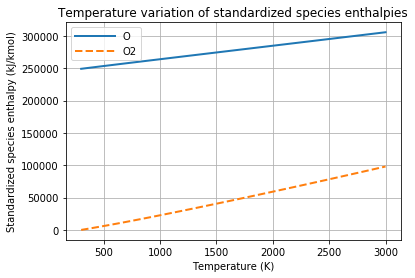

In [28]:
# fill the species enthalpy arrays
# the factors of 1000. convert from J/kmol to kJ/kmol
for i , T in enumerate(temp):
    gas1.TP = T, None
    h_O [i] = gas1.partial_molar_enthalpies[gas1.species_index('O') ] / 1000.
    h_O2[i] = gas1.partial_molar_enthalpies[gas1.species_index('O2')] / 1000.
    
# generate plot, and save a copy to the current working directory
fig, ax = plt.subplots()
ax.plot(temp, h_O,  label='O',  ls='solid',   lw=2)
ax.plot(temp, h_O2, label='O2', ls='dashed',  lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Standardized species enthalpy (kJ/kmol)',
       title ='Temperature variation of standardized species enthalpies')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("h_vs_T_O-O2.pdf")

This is essentially the same as Figure 2.6, with the exception of the more limited temperature range here.

We can also separate out the formation enthalpies and the sensible enthalpies. We know that the reference temperature is 298.15 K. So, we can get the formation enthalpy at the reference temperature for each species as before:

In [29]:
# set the mixture to the reference temperature
Tref    = 298.15
gas1.TP = Tref , None

# since sensible enthalpies (with respect to Tref) are equal to zero at Tref, 
#   the species standardized enthalpies are equal to the formation enthalpies at Tref
hf_298_O  = gas1.partial_molar_enthalpies[gas1.species_index('O')]
hf_298_O2 = gas1.partial_molar_enthalpies[gas1.species_index('O2')]
hf_298_O , hf_298_O2

(249173627.28704077, 0.016343330944517013)

These are very close to the values of the formation enthalpies at 298 K given in Table A.12 (for O) and Table A.11 (for O2), taking into account the difference in units.

Then to get the individual species sensible enthalpies (with respect to 298 K) as functions of temperature, we subtract the 298 K formation enthalpy from the standardized enthalpy.

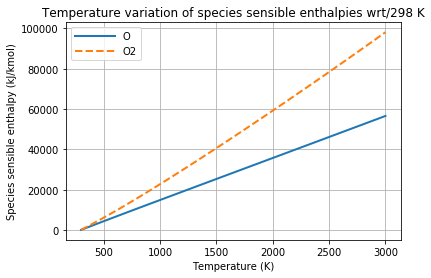

In [30]:
# initialize arrays for species sensible enthalpies with respect to 298 K
hs_298_O  = np.zeros(nt)
hs_298_O2 = np.zeros(nt)

# compute species sensible enthalpies as functions of temperature, and change units to kJ/kmol
for i , T in enumerate(temp):
    gas1.TP = T, None
    hs_298_O [i] = ( gas1.partial_molar_enthalpies[gas1.species_index('O')]  - hf_298_O  ) / 1000.
    hs_298_O2[i] = ( gas1.partial_molar_enthalpies[gas1.species_index('O2')] - hf_298_O2 ) / 1000.
    
# plot species sensible enthalpies as functions of temperature
fig, ax = plt.subplots()
ax.plot(temp, hs_298_O,  label='O',  ls='solid',   lw=2)
ax.plot(temp, hs_298_O2, label='O2', ls='dashed',  lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Species sensible enthalpy (kJ/kmol)',
       title ='Temperature variation of species sensible enthalpies wrt/298 K')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("hs_298_vs_T_O-O2.pdf")

These compare favorably with the values given in Table A.12 (for O) and Table A.11 (for O2). That can be seen more clearly by printing the values:

In [31]:
# print the sensible enthalpy of O (with respect to 298 K) as a function of temperature
hs_298_O

array([4.05258551e+01, 2.20620508e+03, 4.34035274e+03, 6.45907804e+03,
       8.56899798e+03, 1.06714531e+04, 1.27667234e+04, 1.48582438e+04,
       1.69495865e+04, 1.90389727e+04, 2.11266874e+04, 2.32129951e+04,
       2.52981424e+04, 2.73823602e+04, 2.94658662e+04, 3.15488672e+04,
       3.36315620e+04, 3.57141433e+04, 3.77968004e+04, 3.98797218e+04,
       4.19630973e+04, 4.40471208e+04, 4.61319926e+04, 4.82179218e+04,
       5.03051287e+04, 5.23938475e+04, 5.44843287e+04, 5.65768412e+04])

In [32]:
# print the sensible enthalpy of O2 (with respect to 298 K) as a function of temperature
hs_298_O2

array([5.43587589e+01, 3.02695386e+03, 6.08618763e+03, 9.24482008e+03,
       1.24996782e+04, 1.58381288e+04, 1.92445511e+04, 2.27068095e+04,
       2.62155676e+04, 2.97626662e+04, 3.33446534e+04, 3.69586031e+04,
       4.06020724e+04, 4.42730578e+04, 4.79699520e+04, 5.16915008e+04,
       5.54367599e+04, 5.92050515e+04, 6.29959211e+04, 6.68090943e+04,
       7.06444336e+04, 7.45018949e+04, 7.83814845e+04, 8.22832159e+04,
       8.62070665e+04, 9.01529339e+04, 9.41205936e+04, 9.81096548e+04])

The species formation enthalpies at temperatures other than 298 K also can be extracted, but those are not needed.

### 2.2 Mixtures

The enthalpy of a mixture of multiple ideal-gas species can be found by specifying the temperature and mixture composition, where the composition can be expressed in terms of mass fractions or mole fractions. For example, for a stoichiometric mixture of propane and air, and with our usual approximation for air, the relative molar proportions of C3H8 to O2 to N2 are 1 to 5 to 18.8: 

In [33]:
# stoichiometric (equivalence ratio unity) propane-air mixture at 300 K, 1 atm
gas1.TPX = 300. , ct.one_atm , 'C3H8:1.0, O2:5.0, N2:18.8'
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19695  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -4.129e+06     J
   internal energy     -2.2479e+05       -6.624e+06     J
           entropy          6893.9        2.031e+05     J/K
    Gibbs function     -2.2083e+06       -6.507e+07     J
 heat capacity c_p          1050.3        3.095e+04     J/K
 heat capacity c_v          768.14        2.263e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -26.2751
                N2       0.758065         0.720709         -23.3101
              C3H8      0.0403226        0.0603447         -77.3418
     [  +50 minor]        

It is straightforward to confirm that the mixture-averaged values of enthalpy, internal energy, entropy, Gibbs function, and heat capacities are consistent with the usual mixture rules. Since this is an ideal-gas mixture, the mixture-averaged values of enthalpy, internal energy, and heat capacities are independent of the pressure.

For a fuel-lean mixture at an equivalence ratio of 0.8, the relative proportions of C3H8 to O2 to N2 are 1 to 6.25 to 23.5:

In [34]:
# fuel-lean (equivalence ratio 0.8) propane-air mixture at 300 K, 1 atm
gas1.TPX = 300. , ct.one_atm , 'C3H8:1.0, O2:6.25, N2:23.5'
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19211  kg/m^3
  mean mol. weight         29.3465  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.1312e+05        -3.32e+06     J
   internal energy     -1.9812e+05       -5.814e+06     J
           entropy          6895.5        2.024e+05     J/K
    Gibbs function     -2.1818e+06       -6.403e+07     J
 heat capacity c_p          1042.7         3.06e+04     J/K
 heat capacity c_v          759.34        2.228e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.203252         0.221621          -26.267
                N2       0.764228         0.729513          -23.302
              C3H8      0.0325203        0.0488655         -77.5569
     [  +50 minor]        

As an alternative to manually calculating and specifying the reactant composition that corresponds to a particular equivalence ratio, we can use the `set_equivalence_ratio()` attribute introduced in the previous tutorial Notebook:

In [35]:
# stoichiometric (equivalence ratio unity) propane-air mixture at 300 K, 1 atm
gas1.set_equivalence_ratio(1.0 , 'C3H8' , 'O2:1.0 N2:3.76')
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19695  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -4.129e+06     J
   internal energy     -2.2479e+05       -6.624e+06     J
           entropy          6893.9        2.031e+05     J/K
    Gibbs function     -2.2083e+06       -6.507e+07     J
 heat capacity c_p          1050.3        3.095e+04     J/K
 heat capacity c_v          768.14        2.263e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -26.2751
                N2       0.758065         0.720709         -23.3101
              C3H8      0.0403226        0.0603447         -77.3418
     [  +50 minor]        

In [36]:
# fuel-lean (equivalence ratio 0.8) propane-air mixture at 300 K, 1 atm
gas1.set_equivalence_ratio(0.8 , 'C3H8' , 'O2:1.0 N2:3.76')
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19211  kg/m^3
  mean mol. weight         29.3465  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.1312e+05        -3.32e+06     J
   internal energy     -1.9812e+05       -5.814e+06     J
           entropy          6895.5        2.024e+05     J/K
    Gibbs function     -2.1818e+06       -6.403e+07     J
 heat capacity c_p          1042.7         3.06e+04     J/K
 heat capacity c_v          759.34        2.228e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.203252         0.221621          -26.267
                N2       0.764228         0.729513          -23.302
              C3H8      0.0325203        0.0488655         -77.5569
     [  +50 minor]        

In [37]:
# sometimes it is convenient to define the equivalence ratio, fuel, and oxidizer as variables, as we have seen before
phi  = 0.8
fuel = 'C3H8'
air  = 'O2:1.0 N2:3.76'

gas1.set_equivalence_ratio(phi , fuel , air)
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19211  kg/m^3
  mean mol. weight         29.3465  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.1312e+05        -3.32e+06     J
   internal energy     -1.9812e+05       -5.814e+06     J
           entropy          6895.5        2.024e+05     J/K
    Gibbs function     -2.1818e+06       -6.403e+07     J
 heat capacity c_p          1042.7         3.06e+04     J/K
 heat capacity c_v          759.34        2.228e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.203252         0.221621          -26.267
                N2       0.764228         0.729513          -23.302
              C3H8      0.0325203        0.0488655         -77.5569
     [  +50 minor]        

## 3. Finding the temperature for a given mixture specific enthalpy, pressure, and composition

There are situations where one knows the mixture specific enthalpy, pressure, and composition, and one wants to find the temperature. An example is a manual adiabatic flame temperature calculation, which will be covered later in Chapter 2. It is straightforward to do this in Cantera.

The mixture-averaged enthalpy can be set directly using the [`HP`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.HP) attribute, for example. Since the `basis` is currently set to "molar", the specified value of enthalpy will be interpreted as a per-unit-mole of mixture (J/kmol) value.

In [38]:
# specify the mixture enthalpy (J/kmol), leaving the pressure and composition unchanged
gas1.HP = -3.32e+06 , None
gas1()


  gri30:

       temperature         299.989  K
          pressure          101325  Pa
           density         1.19216  kg/m^3
  mean mol. weight         29.3465  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.1313e+05        -3.32e+06     J
   internal energy     -1.9812e+05       -5.814e+06     J
           entropy          6895.5        2.024e+05     J/K
    Gibbs function     -2.1817e+06       -6.403e+07     J
 heat capacity c_p          1042.7         3.06e+04     J/K
 heat capacity c_v          759.33        2.228e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.203252         0.221621          -26.267
                N2       0.764228         0.729513          -23.302
              C3H8      0.0325203        0.0488655         -77.5584
     [  +50 minor]        

Even though we specified the same value of enthalpy that gas1 had previously at a temperature of 300 K, the temperature changed slightly from 300 K, because we used the rounded enthalpy value reported by gas1().

If we increase the mixture enthalpy (keeping the same pressure and composition), the temperature will increase. For example:

In [39]:
# specify the mixture enthalpy (J/kmol), leaving the pressure and composition unchanged
gas1.HP = 0. , None
gas1()


  gri30:

       temperature         406.659  K
          pressure          101325  Pa
           density        0.879444  kg/m^3
  mean mol. weight         29.3465  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      8.7554e-06        0.0002569     J
   internal energy     -1.1521e+05       -3.381e+06     J
           entropy          7217.8        2.118e+05     J/K
    Gibbs function     -2.9352e+06       -8.614e+07     J
 heat capacity c_p          1078.7        3.166e+04     J/K
 heat capacity c_v          795.39        2.334e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.203252         0.221621          -26.422
                N2       0.764228         0.729513         -23.4548
              C3H8      0.0325203        0.0488655         -67.0587
     [  +50 minor]        

Conversely, temperature decreases with decreasing mixture specific enthalpy, for a fixed pressure and mixture composition.

To calculate the temperature manually (i.e., to find the temperature corresponding to a given value of the mixture specific enthalpy, pressure, and composition), one would use the caloric equation of state. For an ideal-gas mixture, the caloric equation of state can be written as (on a molar basis):

$$ \overline h (T) = \Sigma _ i \bigl( \chi _ i \cdot [ \overline h ^0 _ {f,i} (T_{ref}) + \int _ {T_{ref}} ^ T \overline c _ {p,i} ( T ' ) d T ' ] \bigr) $$

where the summation is over all of the species in the mixture, $ \chi _ i $ is the species-$i$ mole fraction in the mixture, $\overline c _ {p,i} ( T ' ) $ is the molar constant-pressure specific heat for species $i$ at temperature $ T ' $, and $ T_{ref} $ is the reference temperature (here, 298.15 K). Equivalently: 

$$ \overline h (T) = \Sigma _ i \bigl( \chi _ i \cdot [ \overline h ^0 _ {f,i} (T_{ref}) + \Delta \overline h _{s,i} (T) ] \bigr) $$

where $ \Delta \overline h_{s,i} (T) = \overline h _i (T) - \overline h ^ 0 _ {f,i} (T_{ref}) = \int _ {T_{ref}} ^ T \overline c _ {p,i} ( T ' ) d T ' $ is the species $i$ sensible enthalpy with respect to the reference temperature.

So, to compute the temperature manually using property tables (such as the ones in Appendix A of Turns 4th ed.), one would need to iterate to find the value of $T$ for which the given values of $ \overline h (T) $ and $ \chi _ i $ are consistent with the caloric equation of state. This is not especially difficult, but can be tedious. Alternatively, one could write a small spreadsheet or computer program to accomplish this. In that case, it would be most natural to specify the temperature dependence of the individual species thermodynamic properties in the form of polynomial coefficients (see Table A.13 of Turns 4th ed.), as is done in Cantera and other computer codes.